In [1]:
import pandas as pd
import sklearn
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from statistics import median
from scipy.spatial import distance

def get_distance_from_centroid(datum, kmeans):
    cluster = kmeans.predict([datum])
    centroid = kmeans.cluster_centers_[cluster]
    dist = distance.euclidean(centroid[0], datum) 
    return dist

def get_median_distance_from_centroids(data_points, kmeans):
    distances = []
    for d in data_points:
        distances.append(get_distance_from_centroid(d, kmeans))
    return median(distances)

def get_anomalies(data_points, kmeans, threshold=2):
    median_dist = get_median_distance_from_centroids(data_points, kmeans)
    anomalies = []
    for k,d in enumerate(data_points):
        dist = get_distance_from_centroid(d, kmeans)
        if dist > median_dist*threshold:
            anomalies.append(k)
    return anomalies

In [3]:
df = pd.read_csv("outputs/resultsclusteredconstituencieslocations.csv")

In [6]:
df["2005_Results"]

0      {'con': 5233, 'lab': 22663, 'lib': 5977, 'ref'...
1      {'con': 19092, 'lab': 9353, 'lib': 12200, 'ref...
2      {'con': 19480, 'lab': 15012, 'lib': 5207, 'ref...
3      {'con': 20333, 'lab': 12716, 'lib': 9578, 'ref...
4      {'con': 11184, 'lab': 21230, 'lib': 7700, 'ref...
                             ...                        
627    {'con': 12491, 'lab': 10877, 'lib': 6967, 'ref...
628    {'con': 3371, 'lab': 20117, 'lib': 6843, 'ref'...
629    {'con': 11879, 'lab': 17070, 'lib': 9621, 'ref...
630    {'con': 11814, 'lab': 5470, 'lib': 19285, 'ref...
631    {'con': 2812, 'lab': 22283, 'lib': 6270, 'ref'...
Name: 2005_Results, Length: 632, dtype: object

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'ONS code', 'New constituency name', 'Total population',
       'Aged 15 years and under', 'Aged 16 to 24 years', 'Aged 25 to 34 years',
       'Aged 35 to 49 years', 'Aged 50 to 64 years', 'Aged 65 years and over',
       'Cluster', '2019_Results', '2017_Results', '2015_Results',
       '2010_Results', '2005_Results', 'Ref16_Results',
       'Low_Confidence_Imputation', '2019_Resultscon', '2019_Resultslab',
       '2019_Resultslib', '2019_Resultsref', '2019_Resultsnat',
       '2019_Resultsoth', '2019_Resultstot', '2019_Resultscon_pc',
       '2019_Resultslab_pc', '2019_Resultslib_pc', '2019_Resultsref_pc',
       '2019_Resultsnat_pc', '2019_Resultsoth_pc', '2017_Resultscon',
       '2017_Resultslab', '2017_Resultslib', '2017_Resultsref',
       '2017_Resultsnat', '2017_Resultsoth', '2017_Resultstot',
       '2017_Resultscon_pc', '2017_Resultslab_pc', '2017_Resultslib_pc',
       '2017_Resultsref_pc', '2017_Resultsnat_pc', '2017_Resultsoth_pc',
       '2015_Result

In [8]:
# df = pd.concat([ewdf,scotdf],ignore_index=True)
# df = df.drop([0,1,577,578]).copy()



drop_cols = ["Unnamed: 0", "ONS code", "New constituency name", "Unnamed: 5", 'Unnamed: 12', 'Unnamed: 20', 'Unnamed: 27','Unnamed: 37']
drop_cols = [ "ONS code", "New constituency name",'Cluster', '2019_Results', '2017_Results', '2015_Results',
       '2010_Results', '2005_Results', 'Low_Confidence_Imputation', '2019_Resultscon', '2019_Resultslab',
       '2019_Resultslib', '2019_Resultsref', '2019_Resultsnat',
       '2019_Resultsoth', '2019_Resultstot', '2019_Resultscon_pc',
       '2019_Resultslab_pc', '2019_Resultslib_pc', '2019_Resultsref_pc',
       '2019_Resultsnat_pc', '2019_Resultsoth_pc', '2017_Resultscon',
       '2017_Resultslab', '2017_Resultslib', '2017_Resultsref',
       '2017_Resultsnat', '2017_Resultsoth', '2017_Resultstot',
       '2017_Resultscon_pc', '2017_Resultslab_pc', '2017_Resultslib_pc',
       '2017_Resultsref_pc', '2017_Resultsnat_pc', '2017_Resultsoth_pc',
       '2015_Resultscon', '2015_Resultslab', '2015_Resultslib',
       '2015_Resultsref', '2015_Resultsnat', '2015_Resultsoth',
       '2015_Resultstot', '2015_Resultscon_pc', '2015_Resultslab_pc',
       '2015_Resultslib_pc', '2015_Resultsref_pc', '2015_Resultsnat_pc',
       '2015_Resultsoth_pc', '2010_Resultscon', '2010_Resultslab',
       '2010_Resultslib', '2010_Resultsref', '2010_Resultsnat',
       '2010_Resultsoth', '2010_Resultstot', '2010_Resultscon_pc',
       '2010_Resultslab_pc', '2010_Resultslib_pc', '2010_Resultsref_pc',
       '2010_Resultsnat_pc', '2010_Resultsoth_pc', '2005_Resultscon',
       '2005_Resultslab', '2005_Resultslib', '2005_Resultsref',
       '2005_Resultsnat', '2005_Resultsoth', '2005_Resultstot',
       '2005_Resultscon_pc', '2005_Resultslab_pc', '2005_Resultslib_pc',
       '2005_Resultsref_pc', '2005_Resultsnat_pc', '2005_Resultsoth_pc',
       'EngReg', 'Scot', 'Region', 'Cluster Des',]


unnamed_cols = [col for col in df.columns if "Unnamed:" in col]
for col in unnamed_cols:
    drop_cols.append(col)
print(drop_cols)
xdf = df.drop(drop_cols,axis=1)
xdf = xdf.dropna(axis=1).copy()
print(xdf.columns)
# xdf.fillna(xdf.mean(), inplace=True)
X = xdf.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)




km = KMeans(random_state=6)
km.fit(X)



anomalies = get_anomalies(X, km)
cluster_labels = km.labels_
cluster_labels[anomalies] = 999
df["Cluster"] = cluster_labels
df["Cluster"].value_counts()

['ONS code', 'New constituency name', 'Cluster', '2019_Results', '2017_Results', '2015_Results', '2010_Results', '2005_Results', 'Low_Confidence_Imputation', '2019_Resultscon', '2019_Resultslab', '2019_Resultslib', '2019_Resultsref', '2019_Resultsnat', '2019_Resultsoth', '2019_Resultstot', '2019_Resultscon_pc', '2019_Resultslab_pc', '2019_Resultslib_pc', '2019_Resultsref_pc', '2019_Resultsnat_pc', '2019_Resultsoth_pc', '2017_Resultscon', '2017_Resultslab', '2017_Resultslib', '2017_Resultsref', '2017_Resultsnat', '2017_Resultsoth', '2017_Resultstot', '2017_Resultscon_pc', '2017_Resultslab_pc', '2017_Resultslib_pc', '2017_Resultsref_pc', '2017_Resultsnat_pc', '2017_Resultsoth_pc', '2015_Resultscon', '2015_Resultslab', '2015_Resultslib', '2015_Resultsref', '2015_Resultsnat', '2015_Resultsoth', '2015_Resultstot', '2015_Resultscon_pc', '2015_Resultslab_pc', '2015_Resultslib_pc', '2015_Resultsref_pc', '2015_Resultsnat_pc', '2015_Resultsoth_pc', '2010_Resultscon', '2010_Resultslab', '2010_Res

Cluster
2      130
0      121
7       97
5       66
3       61
1       51
6       44
999     34
4       28
Name: count, dtype: int64

In [28]:
df[df["Ref16_Results"]<0.4]

,Unnamed: 0,ONS code,New constituency name,Total population,Aged 15 years and under,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,Aged 50 to 64 years,Aged 65 years and over,...,2005_Resultslib_pc,2005_Resultsref_pc,2005_Resultsnat_pc,2005_Resultsoth_pc,EngReg,Scot,Region,Cluster Des,Latitude,Longitude
3,3,E14001065,Altrincham and Sale West,100924,0.212833,0.082260,0.100719,0.219046,0.194859,0.190282,...,0.220874,0,0.000000,0.016996,North West,False,North West,Brexit Conservative,53.398450,-2.351823
20,20,E14001080,Bath,102411,0.147939,0.214629,0.122913,0.168004,0.174117,0.172398,...,0.440530,0,0.000000,0.072610,South West,False,South West,Anomalous,51.381386,-2.359696
21,21,E14001081,Battersea,108899,0.155903,0.105022,0.294772,0.221614,0.136675,0.086014,...,0.145875,0,0.000000,0.050666,London,False,London,Remain,51.470793,-0.172214
25,25,E14001085,Bermondsey and Old Southwark,107159,0.140107,0.148599,0.275016,0.218139,0.145790,0.072349,...,0.472568,0,0.000000,0.075379,London,False,London,Remain,51.494538,-0.069160
26,26,E14001086,Bethnal Green and Stepney,126756,0.186372,0.171967,0.259844,0.212998,0.108515,0.060304,...,0.123752,0,0.000000,0.410931,0,False,Wales,Remain,51.516868,-0.041660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,627,S14000103,Perth and Kinross-shire,102000,0.164256,0.092739,0.113755,0.181623,0.218503,0.229124,...,0.150579,0,0.322447,0.021916,0,True,Scotland,Nat-Conservative,56.268329,-3.463439
628,628,S14000104,Rutherglen,90300,0.177859,0.091283,0.121138,0.200151,0.214436,0.195134,...,0.184026,0,0.145274,0.039048,0,True,Scotland,SNP,55.828389,-4.211653
629,629,S14000105,Stirling and Strathallan,103000,0.160007,0.119000,0.125081,0.174560,0.216834,0.204518,...,0.200584,0,0.141374,0.054498,0,True,Scotland,Nat-Conservative,56.260656,-3.779303
630,630,S14000058,West Aberdeenshire and Kincardine,97800,0.188758,0.085324,0.095580,0.206090,0.223372,0.200875,...,0.463047,0,0.112851,0.009100,0,True,Scotland,Nat-Conservative,50.909538,-1.406866


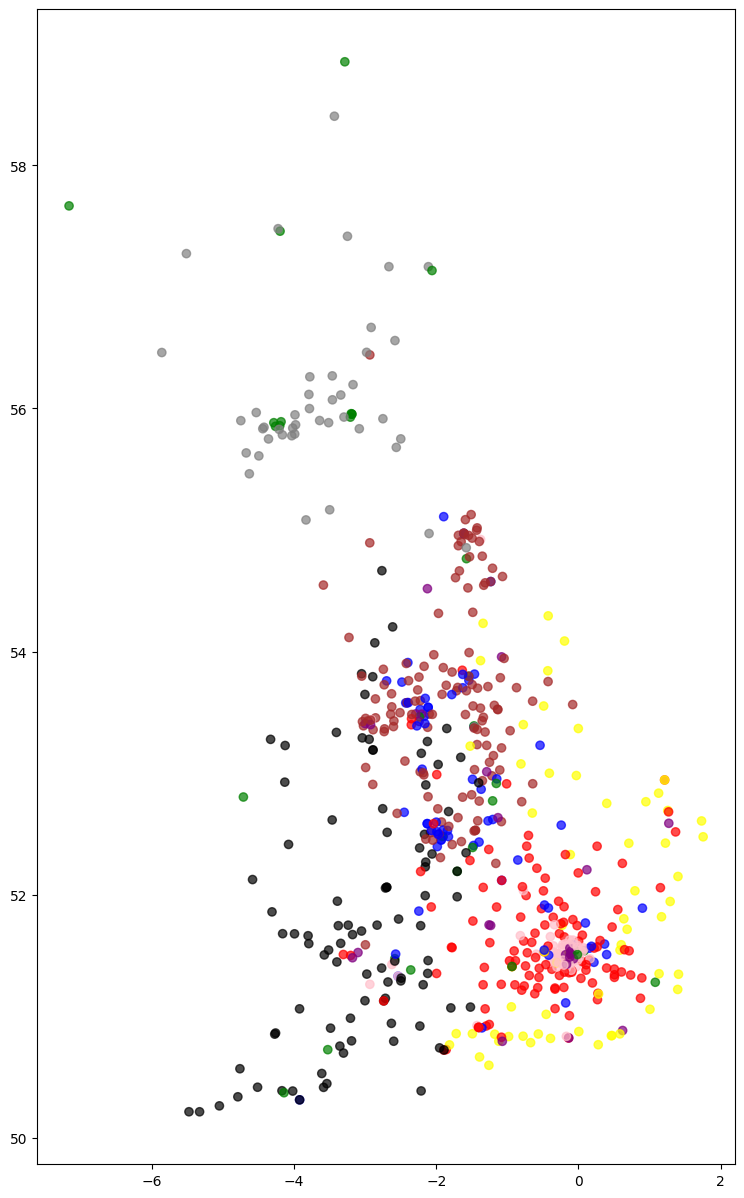

In [9]:
colours = ["red", "pink", "brown", "yellow", "purple", "blue", "grey", "black", "green", "orange", "navy"]
cluster_colours ={}
for k,c  in enumerate(list(set(list(df["Cluster"])))):
    cluster_colours[c] = colours[k]
ax = plt.figure()
ax.set_size_inches(9,15)
plt.scatter(df["Longitude"], df["Latitude"], c=[cluster_colours[c] for c in df["Cluster"]], alpha=0.7)

In [30]:
for c, col in cluster_colours.items():
    print(c, col, df["Cluster"].value_counts()[c])

0 red 121
1 pink 51
2 brown 130
3 yellow 61
4 purple 28
5 blue 66
6 grey 44
7 black 97
999 green 34


In [31]:
clusters = list(set(list(df["Cluster"])))
print("AGE: ",df["Aged 65 years and over"].mean())
print("Ref: ",df["Ref16_Results"].mean())
print("Lab: ",df["Latitude"].mean())
for c in clusters:
    rdf = df[df["Cluster"]==c]
    print("Cluster: ",c,"_________________________")
    # if c == 0:
    #     print("Young Labour Cities")
    # if c == 1:
    #     print("Old Conservative Heartlands")
    # if c == 2:
    #     print("Leave-voting Labour(Red Wall?)")
    # if c == 3:
    #     print("Conservative-LibDem battlegrounds")
    # if c == 4:
    #     print("SNP/Plaid Heartlands")
    # if c == 5:
    #     print("Labour Strongholds")
    # if c == 6:
    #     print("Young Labour Areas")
    # if c == 7:
    #     print("Leave-voting Conservative area")

    #10 2024
    if c == 0:
        print("South East: Hertsmere") #Labour
    if c == 1:
        print("Young, Remain, Central London?: Mitcham and Morden") #Brexit
    if c == 2:
        print("North: Spen Valley") #Marginals
    if c == 3:
        print("Old, East: Maldon") #SNP
    if c == 4:
        print("Remain: Oxford East") #Pro-Brexit Conservatives
    if c == 5:
        print("Young, Brexit-voting, : Coventry East") #Conservative
    if c == 6:
        print("Far North, Remain, Strong Labour Vote, common in London, Muslim/Immigrant : Cowdenbeath and Kirkcaldy") #Immigrant
    if c == 7:
        print("South West, Old: Central Suffolk and North Ipswich") #LibCon
    if c == 8:
        print("Very Young Very Remain, common in London: Ealing Central and Acton") #Remain
    if c == 9:
        print("Nationalist V Conservatives Area: Central Ayrshire") #Nat-Con Marginals
    if c ==999:
        print("Anomalous")
    
    def print_feat_with_diff(feat, df=df, rdf=rdf):
        return print(feat,  rdf[feat].mean(), " + ", rdf[feat].mean() - df[feat].mean())
    
    print("AGE: ",rdf["Aged 65 years and over"].mean(), " + ", rdf["Aged 65 years and over"].mean() - df["Aged 65 years and over"].mean())
    print("AGE: ",rdf["Aged 15 years and under"].mean())
    print_feat_with_diff("Aged 65 years and over")
    print_feat_with_diff("Aged 15 years and under")
    print_feat_with_diff("Ref16_Results")
    print_feat_with_diff("Longitude")
    print_feat_with_diff("Latitude")
    print("Ref: ",rdf["Ref16_Results"].mean())

    # print("Con: ",rdf["2019_Resultscon_pc"].mean())
    # print("Lab: ",rdf["2019_Resultslab_pc"].mean())
    # print("Lib: ",rdf["2019_Resultslib_pc"].mean())
    # print("Ref: ",rdf["2019_Resultsref_pc"].mean())
    # print("Nat: ",rdf["2019_Resultsnat_pc"].mean())


AGE:  0.19072858216367955
Ref:  0.5187494686441332
Lab:  52.65083956431962
Cluster:  0 _________________________
South East: Hertsmere
AGE:  0.18408591484644488  +  -0.006642667317234674
AGE:  0.19304581755543657
Aged 65 years and over 0.18408591484644488  +  -0.006642667317234674
Aged 15 years and under 0.19304581755543657  +  0.01077800306879198
Ref16_Results 0.5192972149344642  +  0.0005477462903310526
Longitude -0.5548099984373288  +  1.0210343625895368
Latitude 51.6576012516529  +  -0.993238312666719
Ref:  0.5192972149344642
Cluster:  1 _________________________
Young, Remain, South, London?: Mitcham and Morden
AGE:  0.12080016563096702  +  -0.06992841653271253
AGE:  0.20127281166551744
Aged 65 years and over 0.12080016563096702  +  -0.06992841653271253
Aged 15 years and under 0.20127281166551744  +  0.019004997178872857
Ref16_Results 0.38973226318314097  +  -0.1290172054609922
Longitude -0.5833306816583638  +  0.9925136793685018
Latitude 51.60419877058824  +  -1.0466407937313775


In [24]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)
df.loc[closest].loc[:,["Cluster",'New constituency name']]

,Cluster,New constituency name
238,0,Hertsmere
328,1,Mitcham and Morden
470,2,Spen Valley
306,3,Maldon
381,4,Oxford East
132,5,Coventry East
589,6,Cowdenbeath and Kirkcaldy
105,7,Central Suffolk and North Ipswich
